In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
from sklearn.linear_model import LinearRegression

theta-hat = (X^T.X)^-1 . (X^T.y)

In [3]:
np.random.seed(10)

babies =range(10)
months =np.arange(13)

data= [(month,np.dot(month,24.7)+np.random.normal(loc=0,scale=20)) 
for month in months
for baby in babies]

month_data = [ele[0] for ele in data]
weight_data = [ele[1] for ele in data]

<AxesSubplot:>

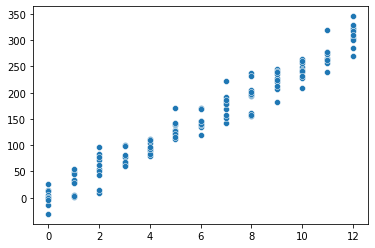

In [4]:
sns.scatterplot(month_data,weight_data)

In [5]:
X=np.array(month_data)
X=np.c_[X,np.ones(X.shape[0])]
gender = np.random.binomial(n=1, p=0.5, size=len(babies)*len(months)) ## male=0, female=1
X=np.c_[X,gender]
y=np.array(weight_data)
X.shape

(130, 3)

In [6]:
def ols(X,y):
    xtx=np.dot(X.T,X)
    inv_xtx=np.linalg.inv(xtx)
    xty=np.dot(X.T,y)
    return np.dot(inv_xtx,xty)

In [7]:
params=ols(X,y)
params

array([24.63320421, -0.53604319,  5.6979177 ])

<AxesSubplot:>

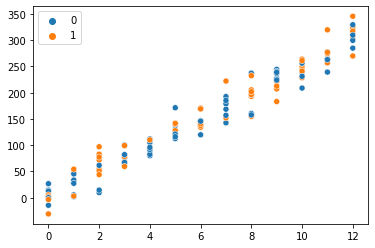

In [8]:
sns.scatterplot(month_data,weight_data,gender)

We will investigate four key metrics:<br>
<br>
Sum of Squared Errors (SSE)<br>
Total Sum of Squares (SST)<br>
R^2<br>
Adjusted R^2<br>
Lastly, df_t is the degrees of freedom of the estimate of the population variance of the dependent variable and df_e is the degrees of freedom of the estimate of the underlying population error variance<br><br>
<img src="images\linear_regression_metric_equations.png">

In [11]:
class Stats:

    def __init__(self,X,y,model):
        self.data=X
        self.target=y
        self.model=model
        self._dft=X.shape[0]-1
        self._dfe=X.shape[0]-X.shape[1]-1

    def sse(self):
        squared_error=(self.target -self.model.predict(self.data))**2
        return np.sum(squared_error)

    def sst(self):
        avg_y=np.mean(self.target)
        squared_error = (self.target-avg_y)**2
        return np.sum(squared_error)

    def r_squared(self):
        return 1- (self.sse()/self.sst())

    def adj_r_squared(self):
        return 1-(self.sse()/self._dfe)/(self.sst()/self._dft)
        

In [17]:
np.random.seed(10)

babies =range(10)
months =np.arange(13)

data= [(month,np.dot(month,24.7)+np.random.normal(loc=0,scale=20)) 
for month in months
for baby in babies]

month_data = np.array([ele[0] for ele in data])
weight_data =np.array([ele[1] for ele in data])

In [19]:
X=month_data.reshape(-1,1)
y=weight_data
lr =LinearRegression()
lr.fit(X,y)

LinearRegression()

In [21]:
def pretty_print_stats(stats_obj):
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [22]:
stats=Stats(X,y,lr)
pretty_print_stats(stats)


sse:     50253.0180
sst:     1158834.2148
r^2:     0.9566
adj_r^2: 0.9563
